### Ames Housing Project Suggestions
Data science is not a linear process. In this project, in particular, you will likely find that EDA, data cleaning, and exploratory visualizations will constantly feed back into each other. Here's an example:

During basic EDA, you identify many missing values in a column/feature.
You consult the data dictionary and use domain knowledge to decide what is meant by this missing feature.
You impute a reasonable value for the missing value.
You plot the distribution of your feature.
You realize what you imputed has negatively impacted your data quality.
You cycle back, re-load your clean data, re-think your approach, and find a better solution.
Then you move on to your next feature. There are dozens of features in this dataset.

Figuring out programmatically concise and repeatable ways to clean and explore your data will save you a lot of time.

The outline below does not necessarily cover every single thing that you will want to do in your project. You may choose to do some things in a slightly different order. Many students choose to work in a single notebook for this project. Others choose to separate sections out into separate notebooks. Check with your local instructor for their preference and further suggestions.

## EDA


In [1]:
#let's import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
#reading the data
train= pd.read_csv('./data/train.csv')
test= pd.read_csv('./data/test.csv')

In [3]:
#let's look at data sets
train.shape

(2051, 81)

In [4]:
test.shape

(878, 80)

## After 3 times cleaning, i decided to concat the training and testing data at the beginning of cleanning data then start cleaning on the whole data set and after completion of the cleaning, I will separate rows (0-2050)for train data set and rows (2050-to the end) for test data set.

### Reason? since when i did the cleaning separetly, the number of columns and the transformation and all the claning and everything got messed up so bad. I talked with Sara regarding this step.

In [5]:
#I concat both train and test data set to change them once at the same time and then i will separe them again
X_train=train.drop(['SalePrice'], axis=1)
X_train.tail(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,11,2009,WD
2050,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,6,2010,WD


In [6]:
#X_tt is the two data set concated together.
X_tt=pd.concat([X_train, test], ignore_index=True)

In [7]:
X_tt.tail(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
2927,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,GdWo,NaN,0,5,2007,WD
2928,1939,535327160,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,GdWo,NaN,0,3,2007,WD


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [10]:
#let's find missing values
pd.set_option('display.max_rows', 100)
null=X_tt.isnull().sum()[X_tt.isnull().sum()>0]

In [11]:
null

Lot Frontage       490
Alley             2731
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2916
Fence             2357
Misc Feature      2823
dtype: int64

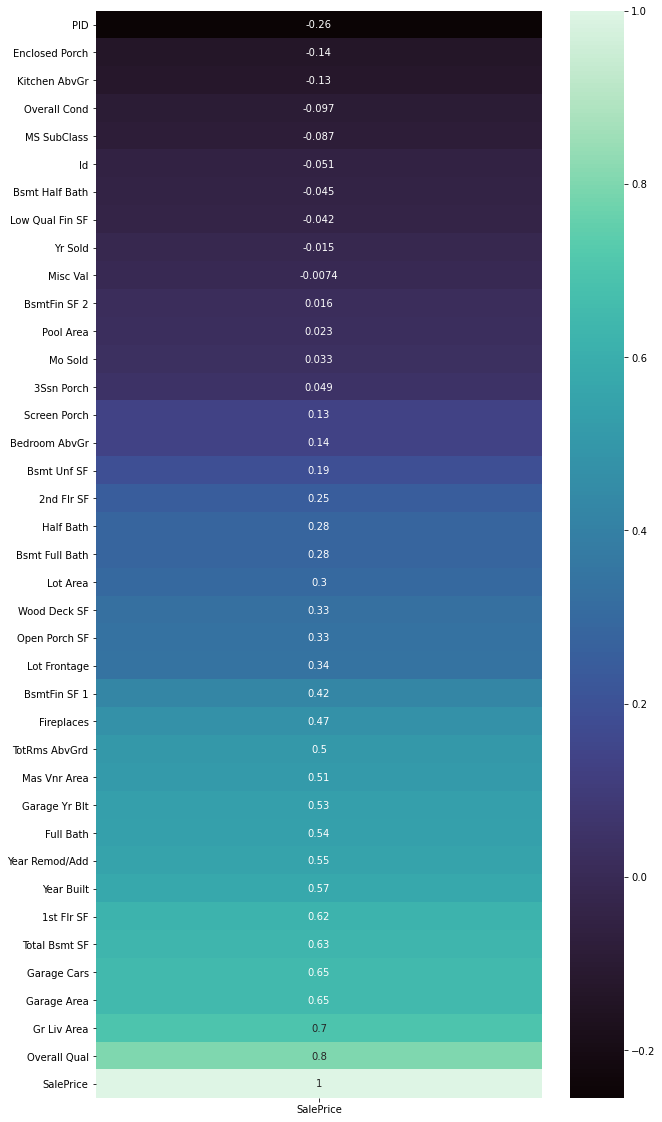

In [12]:
# correlation graph
fig, ax=plt.subplots(figsize=(10,20))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice'), annot=True,cmap='mako', ax=ax);

### let's look at the features distribution 

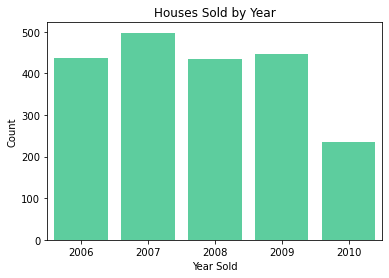

In [13]:
import seaborn as sns
ax = sns.countplot(x="Yr Sold", data=train, color='#4ae0a1')
ax.set(xlabel='Year Sold', ylabel='Count');
ax.set_title('Houses Sold by Year');

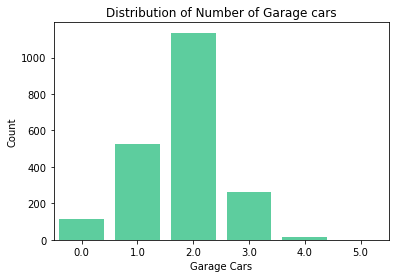

In [14]:
ax = sns.countplot(x="Garage Cars", data=train, color='#4ae0a1')
ax.set(xlabel='Garage Cars', ylabel='Count');
ax.set_title('Distribution of Number of Garage cars');

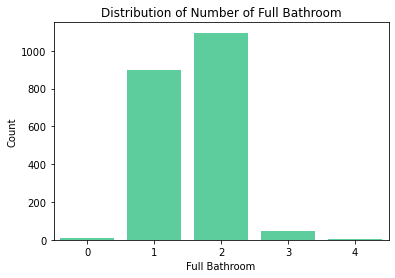

In [15]:
ax = sns.countplot(x="Full Bath", data=train, color='#4ae0a1')
ax.set(xlabel='Full Bathroom', ylabel='Count');
ax.set_title('Distribution of Number of Full Bathroom');


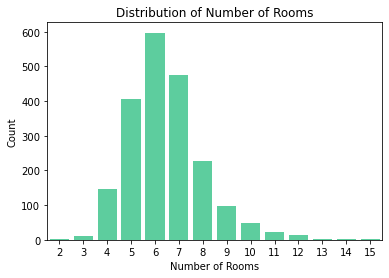

In [16]:
ax = sns.countplot(x="TotRms AbvGrd", data=train, color='#4ae0a1')
ax.set(xlabel='Number of Rooms', ylabel='Count');
ax.set_title('Distribution of Number of Rooms');

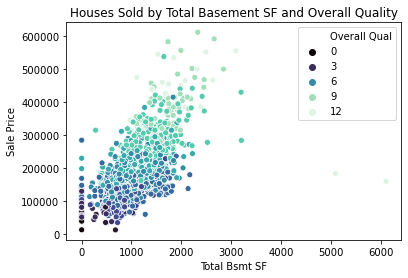

In [17]:
#let's look at some distribution of sale price by features
ax= sns.scatterplot(train['Total Bsmt SF'],train['SalePrice'],hue=train['Overall Qual'], palette="mako" );
ax.set(xlabel='Total Bsmt SF', ylabel='Sale Price');
ax.set_title('Houses Sold by Total Basement SF and Overall Quality');

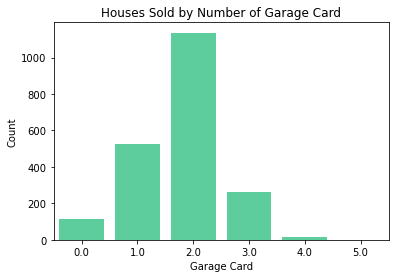

In [18]:
ax = sns.countplot(x="Garage Cars", data=train, color='#4ae0a1')
ax.set(xlabel='Garage Card', ylabel='Count');
ax.set_title('Houses Sold by Number of Garage Card');

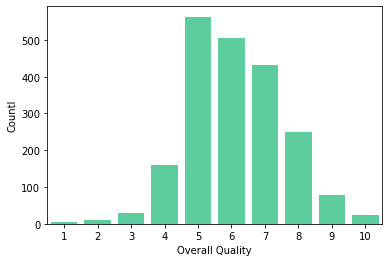

In [19]:
import seaborn as sns
ax = sns.countplot(x="Overall Qual", data=train, color='#4ae0a1')
ax.set(xlabel='Overall Quality', ylabel='Countl');

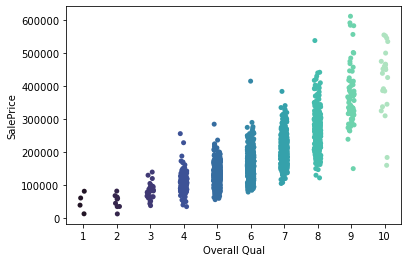

In [20]:
#overall quality is very in high correlated with price
sns.stripplot(train['Overall Qual'],train['SalePrice'], palette="mako" );
ax.set(xlabel='Overall Qual', ylabel='Sale Price');
ax.set_title('Houses Sale Price by Overall Quality');

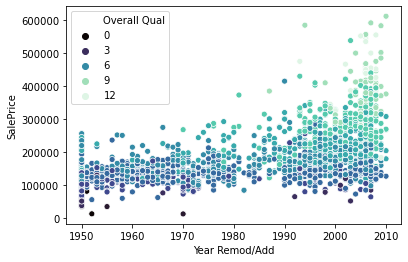

In [21]:
sns.scatterplot(train['Year Remod/Add'],train['SalePrice'],hue=train['Overall Qual'], palette="mako" );

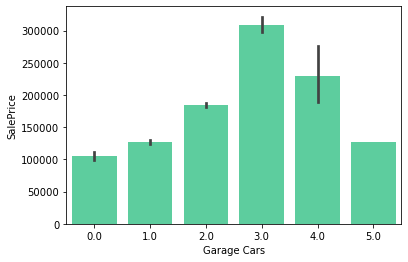

In [22]:
sns.barplot(train['Garage Cars'],train['SalePrice'], color='#4ae0a1');
ax.set(xlabel='Number of Garage Cars', ylabel='Sale Price');
ax.set_title('Houses Sale Price by Number of Garage Cars');

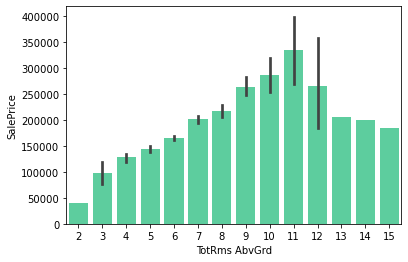

In [23]:
sns.barplot(train['TotRms AbvGrd'],train['SalePrice'], color='#4ae0a1' );
ax.set(xlabel='Number of Total Rooms', ylabel='Sale Price');
ax.set_title('Houses Sale Price by Number of Garage Cars');

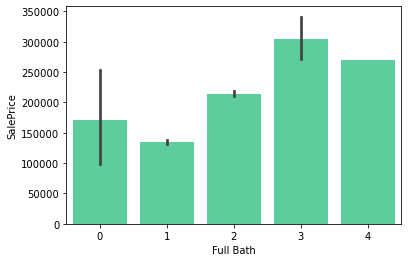

In [24]:
sns.barplot(train['Full Bath'],train['SalePrice'], color='#4ae0a1' );

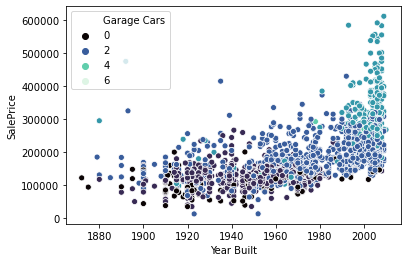

In [25]:
#sale price by different features and i added the hue of category feature such as garage cars and overal quality
sns.scatterplot(train['Year Built'],train['SalePrice'],hue=train['Garage Cars'], palette="mako" );

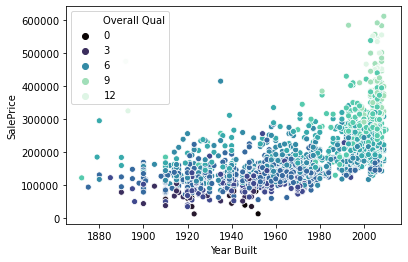

In [26]:
sns.scatterplot(train['Year Built'],train['SalePrice'],hue=train['Overall Qual'], palette="mako" );

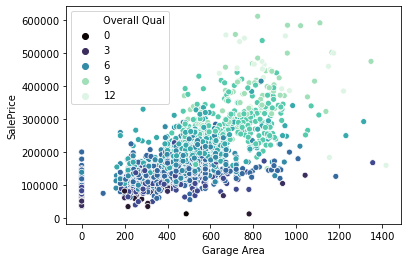

In [27]:
sns.scatterplot(train['Garage Area'],train['SalePrice'],hue=train['Overall Qual'], palette="mako" );

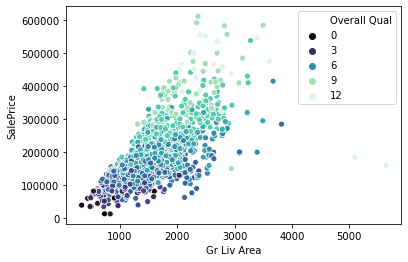

In [28]:
sns.scatterplot(x=train['Gr Liv Area'],y= train['SalePrice'], hue=train['Overall Qual'], palette="mako" );

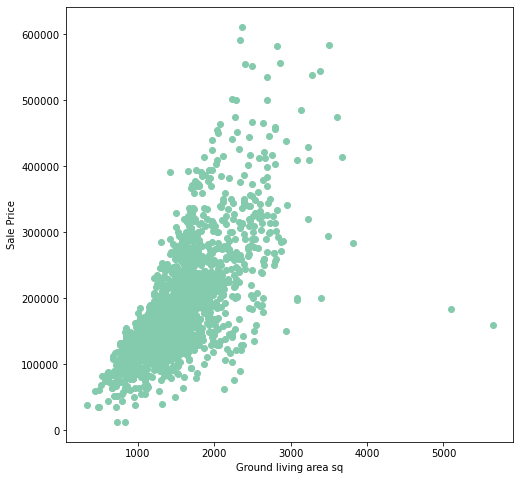

In [29]:
#let's plot the ground area sf and sale price
plt.figure(figsize=(8,8))
plt.scatter(x = train['Gr Liv Area'], y = train['SalePrice'], color='#84CAAD')
plt.xlabel('Ground living area sq')
plt.ylabel('Sale Price')
plt.show()


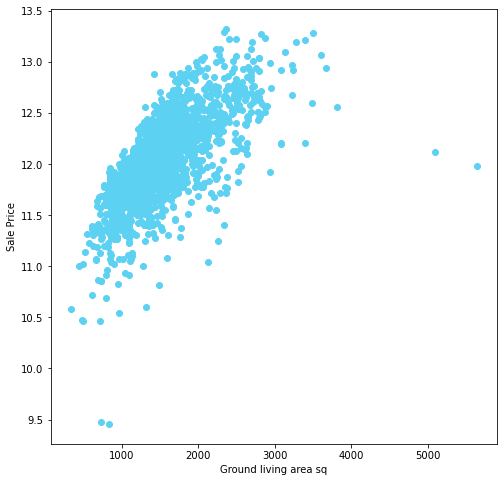

In [30]:
#let's get the log of sale price and compare again
plt.figure(figsize=(8,8))
plt.scatter(x = train['Gr Liv Area'], y = np.log(train['SalePrice']), color='#5cd1f2')
plt.xlabel('Ground living area sq')
plt.ylabel('Sale Price')
plt.show();

In [31]:
#i am going to touch these highly negative correlated data with salesprice
#PID, Enclosed porch, kitchen abvGr, 
#I will come back and will check them

In [32]:
#Im going to get dummies from the categorical(nominal- since ordinal has orders dont use it)
#variables with no null values

In [33]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

## Getting dummies from categorical variables without null values and dropping the first columns

In [34]:
X_tt=pd.get_dummies(X_tt,columns=['MS SubClass','MS Zoning','Street','Land Contour','Condition 1','Condition 2',
                                     'House Style','Lot Config','Bldg Type','Neighborhood','Roof Style',
                                     'Roof Matl','Exterior 1st','Exterior 2nd','Foundation','Heating','Central Air',
                                     'Sale Type'], drop_first=True)

## I am going to remove the null values in the variables with 1 and 2 nulls !im going to apply this on train data sets after i separe the two data sets from X_tt

In [35]:
#im going to apply this on train data sets after i separe the two data sets 
#for i in X_tt[X_tt['BsmtFin SF 1'].isnull()==True].loc[:,'Id']:
    #X_tt = X_tt[X_tt['Id']!=i]
    
#for i in X_tt[X_tt['BsmtFin SF 2'].isnull()==True].loc[:,'Id']:
    #X_tt = X_tt[X_tt['Id']!=i]
    
#for i in X_tt[X_tt['Bsmt Unf SF'].isnull()==True].loc[:,'Id']:
    #X_tt = X_tt[X_tt['Id']!=i]
    
#for i in X_tt[X_tt['Total Bsmt SF'].isnull()==True].loc[:,'Id']:
    #X_tt = X_tt[X_tt['Id']!=i]
    
#for i in X_tt[X_tt['Garage Area'].isnull()==True].loc[:,'Id']:
    #X_tt = X_tt[X_tt['Id']!=i]
    
#for i in train[train['Bsmt Full Bath'].isnull()==True].loc[:,'Id']:
    #train = train[train['Id']!=i]
    
#for i in train[train['Garage Cars'].isnull()==True].loc[:,'Id']:
    #train = train[train['Id']!=i]
    
#for i in train[train['Bsmt Half Bath'].isnull()==True].loc[:,'Id']:
    #train = train[train['Id']!=i]

In [36]:
#double check the 1 null value data
null=X_tt.isnull().sum()[X_tt.isnull().sum()>0]
null

Lot Frontage       490
Alley             2731
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2916
Fence             2357
Misc Feature      2823
dtype: int64

In [37]:
X_tt['Mo Sold']

0        3
1        4
2        1
3        4
4        3
        ..
2924    11
2925     8
2926     8
2927     5
2928     3
Name: Mo Sold, Length: 2929, dtype: int64

In [38]:
#now lets get dummies from month of the sale
X_tt=pd.get_dummies(X_tt, columns=['Mo Sold'], drop_first=True)

In [39]:
#let's look at the the rest variables without null values:
X_tt['Lot Shape'].value_counts()

Reg    1859
IR1     978
IR2      76
IR3      16
Name: Lot Shape, dtype: int64

### Changing the categorical responses (data) to numerical 

In [40]:
X_tt['Lot Shape']= X_tt['Lot Shape'].map({'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3})

In [41]:
X_tt['Lot Shape'].unique()

array([1, 0, 2, 3])

In [42]:
X_tt['Utilities'].value_counts()

AllPub    2926
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64

In [43]:
X_tt['Utilities']=X_tt['Utilities'].map({'AllPub':0,'NoSeWa':1,'NoSewr':2})

In [44]:
X_tt['Utilities'].unique()

array([0, 1, 2])

In [45]:
X_tt['Land Slope'].value_counts()

Gtl    2788
Mod     125
Sev      16
Name: Land Slope, dtype: int64

In [46]:
X_tt['Land Slope'] = X_tt['Land Slope'].map({'Gtl':0,'Mod':1,'Sev':2})

In [47]:
X_tt['Electrical'] = X_tt['Electrical'].fillna('None')

In [48]:
X_tt['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', 'None'], dtype=object)

In [49]:
X_tt=X_tt[X_tt.Electrical != 'Mix']

In [50]:
X_tt['Electrical'].unique()


array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'None'], dtype=object)

In [51]:
X_tt['Electrical']= X_tt['Electrical'].map({'None':0, 'SBrkr':0 ,'FuseA':1 ,'FuseF':2, 'FuseP':3 })

In [52]:
X_tt['Electrical'].value_counts()

0    2682
1     188
2      50
3       8
Name: Electrical, dtype: int64

In [53]:
X_tt['Functional'].value_counts()

Typ     2727
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       8
Sal        2
Sev        2
Name: Functional, dtype: int64

In [54]:
X_tt['Functional'] = X_tt['Functional'].map({'Typ':0,'Min1':1,'Min2':2,'Mod':3,'Maj1':4,'Maj2':5,'Sev':6,'Sal':7})

In [55]:
X_tt['Paved Drive'].unique()

array(['Y', 'N', 'P'], dtype=object)

In [56]:
X_tt['Paved Drive'] = X_tt['Paved Drive'].map({'N':0,'P':1,'Y':2})

### for all the other variables with no null there are 5 categorical responses as EX, Gd, TA, Fa, Po. mapping them with 0-5

In [57]:
X_tt['Exter Qual'].value_counts()

TA    1798
Gd     989
Ex     106
Fa      35
Name: Exter Qual, dtype: int64

In [58]:
for i in ['Exter Qual','Exter Cond','Kitchen Qual','Heating QC']:
    X_tt[i]= X_tt[i].map({'Ex':4,'Gd':3,'TA':2,'Fa':1.5,'Po':1})

In [59]:
#for garages related columns 'Garage Area','Garage Type','Garage Yr Blt',
#'Garage Finish','Garage Cars','Garage Qual','Garage Cond'
#all of these nan values for garage related is that because there is no garage for these houses
#so let's fillna with 0 and none
pd.set_option('display.max_columns', 200)

In [60]:
null_garage_related= X_tt[X_tt['Garage Cond'].isnull()==True]
null_garage_related[['Garage Area','Garage Type','Garage Yr Blt','Garage Finish','Garage Cars','Garage Qual','Garage Cond']]

,Garage Area,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Qual,Garage Cond
28,0.0,NaN,NaN,NaN,0.0,NaN,NaN
53,0.0,NaN,NaN,NaN,0.0,NaN,NaN
65,0.0,NaN,NaN,NaN,0.0,NaN,NaN
79,0.0,NaN,NaN,NaN,0.0,NaN,NaN
101,0.0,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...
2815,360.0,Detchd,NaN,NaN,1.0,NaN,NaN
2830,0.0,NaN,NaN,NaN,0.0,NaN,NaN
2854,0.0,NaN,NaN,NaN,0.0,NaN,NaN
2864,0.0,NaN,NaN,NaN,0.0,NaN,NaN


In [61]:
X_tt['Garage Area']

0       475.0
1       559.0
2       246.0
3       400.0
4       484.0
        ...  
2924    488.0
2925    480.0
2926    322.0
2927    528.0
2928    390.0
Name: Garage Area, Length: 2928, dtype: float64

In [62]:
#fiiling na with none since there is no garage
#for year 
X_tt['Garage Type'] = X_tt['Garage Type'].fillna('None')
X_tt['Garage Finish'] = X_tt['Garage Finish'].fillna('None')
X_tt['Garage Cond'] = X_tt['Garage Cond'].fillna('None')
X_tt['Garage Yr Blt'] = X_tt['Garage Yr Blt'].fillna('None')
X_tt['Garage Qual'] = X_tt['Garage Qual'].fillna('None')

In [63]:
X_tt.head(2)

,Id,PID,Lot Frontage,Lot Area,Alley,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Yr Sold,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,...,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12
0,109,533352170,NaN,13517,NaN,1,0,0,6,8,1976,2005,BrkFace,289.0,3.0,2.0,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,4.0,0,725,754,0,1479,0.0,0.0,2,1,3,1,3.0,6,0,0,NaN,Attchd,1976,RFn,2.0,475.0,TA,TA,2,0,44,0,0,0,0,NaN,NaN,NaN,0,2010,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,544,531379050,43.0,11492,NaN,1,0,0,7,5,1996,1997,BrkFace,132.0,3.0,2.0,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,4.0,0,913,1209,0,2122,1.0,0.0,2,1,4,1,3.0,8,0,1,TA,Attchd,1997,RFn,2.0,559.0,TA,TA,2,0,74,0,0,0,0,NaN,NaN,NaN,0,2009,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

In [64]:
X_tt['Garage Type'].value_counts()

Attchd     1731
Detchd      781
BuiltIn     185
None        157
Basment      36
2Types       23
CarPort      15
Name: Garage Type, dtype: int64

In [65]:
#get dummies from garage type
X_tt = pd.get_dummies(X_tt, columns=['Garage Type'], drop_first=True)

In [66]:
X_tt['Garage Qual'].unique()

array(['TA', 'Fa', 'None', 'Gd', 'Ex', 'Po'], dtype=object)

In [67]:
#let's make scale for the categorical answers for garage related quetsions
X_tt['Garage Finish']= X_tt['Garage Finish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})
X_tt['Garage Qual']= X_tt['Garage Qual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1.5,'Po':1,'None':0})
X_tt['Garage Cond']= X_tt['Garage Cond'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1.5,'Po':1,'None':0})

In [68]:
X_tt['Garage Qual'].unique()

array([2. , 1.5, 0. , 3. , 4. , 1. ])

In [69]:
X_tt['Garage Yr Blt'].value_counts()

None      159
2005.0    142
2006.0    115
2007.0    114
2004.0     99
         ... 
1943.0      1
1896.0      1
1895.0      1
1919.0      1
2207.0      1
Name: Garage Yr Blt, Length: 104, dtype: int64

In [70]:
#imputing garage year built function
def impute_garage(cols):
    Garage= cols[0]
    year_built= cols[1]
    if Garage=='None':
        return year_built
    else:
        return Garage

In [71]:
X_tt['Garage Yr Blt']=X_tt[['Garage Yr Blt', 'Year Built']].apply(impute_garage, axis=1)

In [72]:
X_tt['Garage Yr Blt'].value_counts()

2005.0    145
2006.0    118
2007.0    116
2004.0    102
2003.0     92
         ... 
1911.0      1
1906.0      1
1933.0      1
1908.0      1
1872.0      1
Name: Garage Yr Blt, Length: 111, dtype: int64

In [73]:
#let's look at basement data

In [74]:
#basement related columns:
#Bsmt Qual     Bsmt Cond    Bsmt Exposure    BsmtFin Type 1  BsmtFin Type 2   BsmtFin SF 1

In [75]:
# let's look at basement reletive data, basement exposure has the most null values
null_basement_related= X_tt[X_tt['Bsmt Exposure'].isnull()==True]
null_basement_related[['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','BsmtFin SF 1']]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,BsmtFin SF 1
12,NaN,NaN,NaN,NaN,NaN,0.0
93,NaN,NaN,NaN,NaN,NaN,0.0
114,NaN,NaN,NaN,NaN,NaN,0.0
146,NaN,NaN,NaN,NaN,NaN,0.0
183,NaN,NaN,NaN,NaN,NaN,0.0
240,NaN,NaN,NaN,NaN,NaN,0.0
249,NaN,NaN,NaN,NaN,NaN,0.0
256,NaN,NaN,NaN,NaN,NaN,0.0
390,NaN,NaN,NaN,NaN,NaN,0.0
437,NaN,NaN,NaN,NaN,NaN,0.0


In [76]:
X_tt['Bsmt Qual'].unique()

array(['TA', 'Gd', 'Fa', nan, 'Ex', 'Po'], dtype=object)

In [77]:
#BsmtFin SF 1 ==0 means there is no basement in the house and that is why all the other 
#related basement columns are null.

X_tt['Bsmt Qual'] = X_tt['Bsmt Qual'].fillna('None')
X_tt['Bsmt Cond'] = X_tt['Bsmt Cond'].fillna('None')
X_tt['Bsmt Exposure'] = X_tt['Bsmt Exposure'].fillna('None')
X_tt['BsmtFin Type 1'] = X_tt['BsmtFin Type 1'].fillna('None')
X_tt['BsmtFin Type 2'] = X_tt['BsmtFin Type 2'].fillna('None')

In [78]:
X_tt['Bsmt Qual'].unique()

array(['TA', 'Gd', 'Fa', 'None', 'Ex', 'Po'], dtype=object)

In [79]:
#let's scale all the other categories for basement related data between 0-4
X_tt['Bsmt Exposure']= X_tt['Bsmt Exposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0,'None':0})

In [80]:
X_tt['Bsmt Qual']= X_tt['Bsmt Qual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1.5,'Po':1,'None':0})
X_tt['Bsmt Cond']= X_tt['Bsmt Cond'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1.5,'Po':1,'None':0})

In [81]:
X_tt['Bsmt Qual'].unique()

array([2. , 3. , 1.5, 0. , 4. , 1. ])

In [82]:
X_tt['BsmtFin Type 1']= X_tt['BsmtFin Type 1'].map({'GLQ':4,'ALQ':3.5,'BLQ':3,'Rec':2.5,'LwQ':2,'Unf':1.5,'None':0})
X_tt['BsmtFin Type 2']= X_tt['BsmtFin Type 2'].map({'GLQ':4,'ALQ':3.5,'BLQ':3,'Rec':2.5,'LwQ':2,'Unf':1.5,'None':0})

In [83]:
#lets take care of other null variables in other columns and fillna with none

In [84]:
X_tt['Fireplace Qu']= X_tt['Fireplace Qu'].fillna('None')
X_tt['Pool QC']= X_tt['Pool QC'].fillna('None')
X_tt['Fence']= X_tt['Fence'].fillna('None')
X_tt['Alley']= X_tt['Alley'].fillna(0)
X_tt['Mas Vnr Type']= X_tt['Mas Vnr Type'].fillna('None')
X_tt['Mas Vnr Area']= X_tt['Mas Vnr Area'].fillna(0)

In [85]:
#let's scale the categorical ones like garage and basement 0-5
X_tt['Fireplace Qu']= X_tt['Fireplace Qu'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1.5,'Po':1,'None':0})
X_tt['Pool QC']= X_tt['Pool QC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1.5,'None':0})
X_tt['Fence']= X_tt['Fence'].map({'GdPrv':3,'GdWo':2,'MnPrv':1,'MnWw':1,'None':0})

In [86]:
X_tt['Alley'].value_counts()

0       2730
Grvl     120
Pave      78
Name: Alley, dtype: int64

In [87]:
X_tt['Alley']= X_tt['Alley'].map(lambda x: 1 if x!=0 else 0)

In [88]:
X_tt['Alley'].value_counts()

0    2730
1     198
Name: Alley, dtype: int64

In [89]:
#let's take care of other dummies
X_tt['Misc Feature'].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Elev     1
Name: Misc Feature, dtype: int64

In [90]:
X_tt= pd.get_dummies(X_tt, columns=['Misc Feature'], drop_first=True)

In [91]:
X_tt= pd.get_dummies(X_tt, columns=['Mas Vnr Type'], drop_first=True)

In [92]:
X_tt['Lot Frontage'].unique()

array([ nan,  43.,  68.,  73.,  82., 137.,  35.,  70.,  21.,  64., 120.,
        24.,  74.,  93.,  34.,  80.,  71.,  72., 109.,  40., 103., 100.,
        92.,  65.,  75.,  60.,  30.,  79.,  41., 105., 107.,  81.,  36.,
        63.,  32.,  94.,  44.,  50.,  48.,  67.,  88.,  83.,  53.,  58.,
        57.,  52.,  87., 134.,  56.,  54., 140.,  78.,  85.,  90.,  96.,
        62.,  49.,  59., 155.,  91.,  61.,  86., 128.,  77.,  42.,  89.,
        51.,  69.,  55., 112.,  76., 125.,  98., 113., 102.,  22., 122.,
        84., 119., 118.,  66.,  95., 108., 195., 106.,  39., 110., 130.,
        97.,  45.,  37., 123.,  38., 129., 115.,  47., 114., 104.,  46.,
       121., 124., 313., 141., 101.,  99., 160., 174.,  26., 144., 138.,
       111.,  25.,  33., 200., 150., 117., 153., 116., 135., 136., 131.,
        31., 149., 168., 152., 126.,  28., 133., 182.])

In [93]:
#lot frontage has so many null values i fill the na values with the mean of the columns
X_tt['Lot Frontage'].mean()

69.20344544708777

In [94]:
#no idea why it did not work: train['Lot Frontage']= train['Lot Frontage'].apply(lambda x: 69.022 if x==np.NaN else x)

In [95]:
X_tt['Lot Frontage'] =X_tt['Lot Frontage'].fillna(X_tt['Lot Frontage'].mean())

In [96]:
X_tt['Lot Frontage'].unique()

array([ 69.20344545,  43.        ,  68.        ,  73.        ,
        82.        , 137.        ,  35.        ,  70.        ,
        21.        ,  64.        , 120.        ,  24.        ,
        74.        ,  93.        ,  34.        ,  80.        ,
        71.        ,  72.        , 109.        ,  40.        ,
       103.        , 100.        ,  92.        ,  65.        ,
        75.        ,  60.        ,  30.        ,  79.        ,
        41.        , 105.        , 107.        ,  81.        ,
        36.        ,  63.        ,  32.        ,  94.        ,
        44.        ,  50.        ,  48.        ,  67.        ,
        88.        ,  83.        ,  53.        ,  58.        ,
        57.        ,  52.        ,  87.        , 134.        ,
        56.        ,  54.        , 140.        ,  78.        ,
        85.        ,  90.        ,  96.        ,  62.        ,
        49.        ,  59.        , 155.        ,  91.        ,
        61.        ,  86.        , 128.        ,  77.  

In [97]:
X_tt['Lot Frontage'].mean()

69.2034454470874

In [98]:
#let's confirm if there is still any null values
X_tt.isnull().sum().sum()

10

In [99]:
X_tt.shape

(2928, 228)

In [100]:
null=X_tt.isnull().sum()[X_tt.isnull().sum()>0]
null

BsmtFin SF 1      1
BsmtFin SF 2      1
Bsmt Unf SF       1
Total Bsmt SF     1
Bsmt Full Bath    2
Bsmt Half Bath    2
Garage Cars       1
Garage Area       1
dtype: int64

In [101]:
#after one time cleaning and made the model, i decided to drop some column from the whole data set(both training and test data of course)
#to see if i will get a better model!

In [102]:
X_tt.drop([ 'Low Qual Fin SF', 'Misc Val', 'Pool Area', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'BsmtFin SF 1','BsmtFin SF 2', 'Bsmt Unf SF','Land Slope','Utilities'], axis=1, inplace=True)

In [103]:
X_tt.shape

(2928, 218)

### separeting the train and test data from X_tt data set since the whole cleaning process has been finished

In [104]:
train_new=X_tt.iloc[0:2050]

In [105]:
train_new.shape

(2050, 218)

In [106]:
train_new['SalePrice']=train['SalePrice']

<ipython-input-106-bdcfc4e1b91d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new['SalePrice']=train['SalePrice']


In [107]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2050
Columns: 219 entries, Id to SalePrice
dtypes: float64(20), int64(29), uint8(170)
memory usage: 1.1 MB


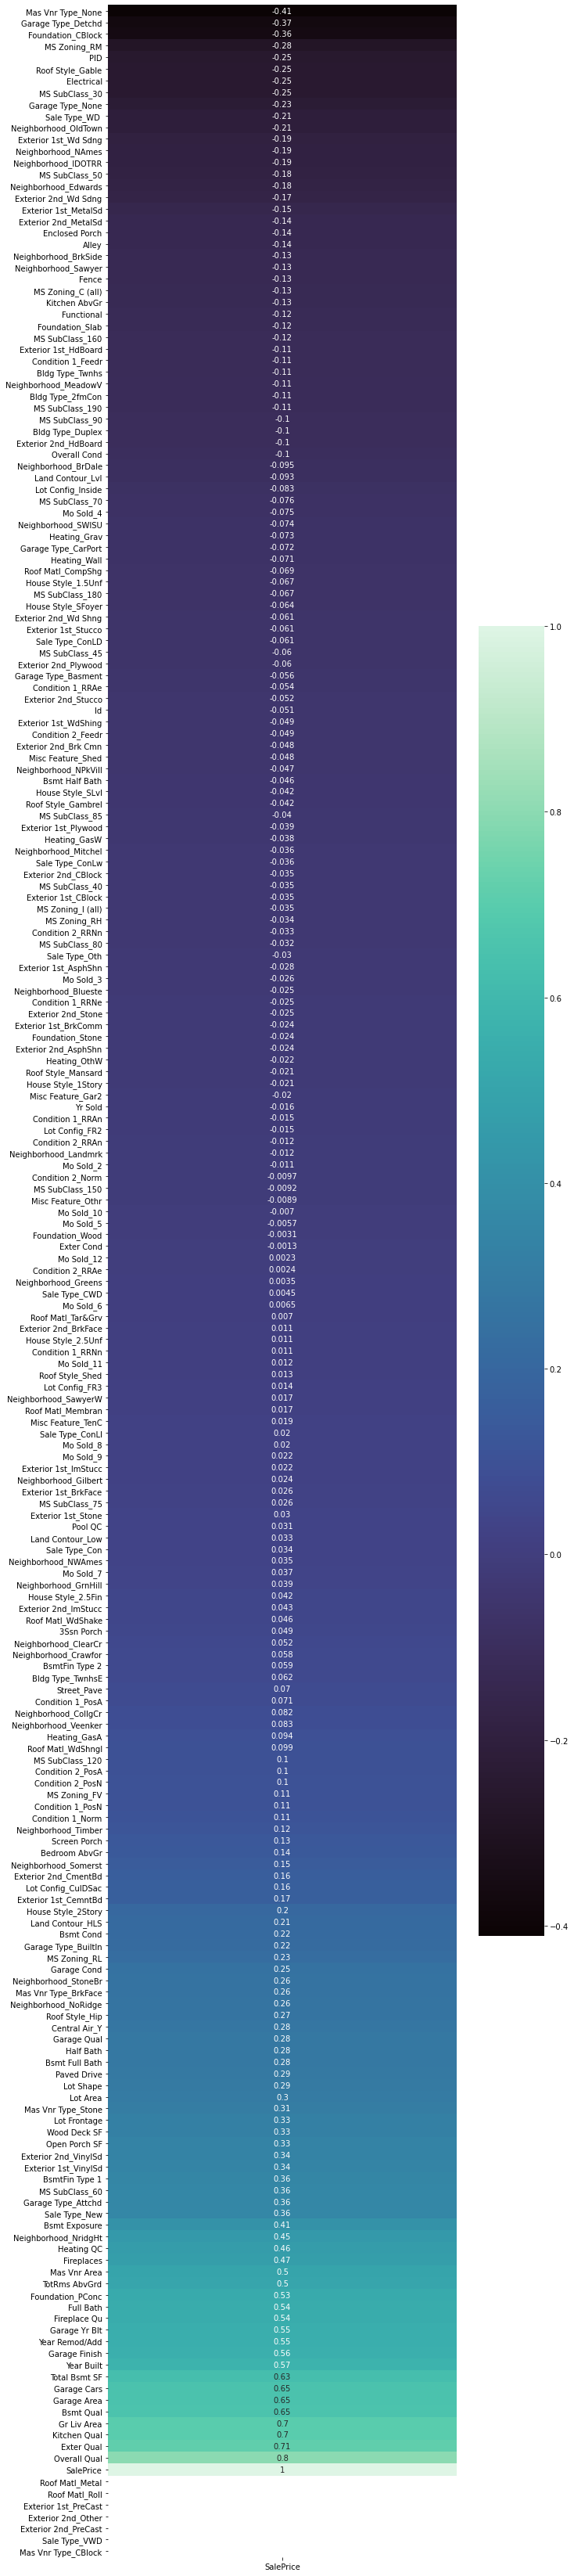

In [108]:
#as we can see, nothing has changed that much for the correlation after or before scaling.
fig, ax=plt.subplots(figsize=(10,60))
sns.heatmap(train_new.corr()[['SalePrice']].sort_values('SalePrice'), annot=True,cmap='mako', ax=ax);

In [109]:
#separe the test data set from the X_tt after all the cleaning and mapping
test_new=X_tt.iloc[2050:]

In [110]:
test_new.shape

(878, 218)

### Now that we separte train and test data let's drop the features nulls in the column that have 1 and 2 null values

In [111]:
#for i in train_new[train_new['BsmtFin SF 1'].isnull()==True].loc[:,'Id']:
    #train_new = train_new[train_new['Id']!=i]
    
#for i in train_new[train_new['BsmtFin SF 2'].isnull()==True].loc[:,'Id']:
    #train_new = train_new[train_new['Id']!=i]
    
#for i in train_new[train_new['Bsmt Unf SF'].isnull()==True].loc[:,'Id']:
    #train_new = train_new[train_new['Id']!=i]
    
for i in train_new[train_new['Total Bsmt SF'].isnull()==True].loc[:,'Id']:
    train_new = train_new[train_new['Id']!=i]
    
for i in train_new[train_new['Garage Area'].isnull()==True].loc[:,'Id']:
    train_new = train_new[train_new['Id']!=i]
    
for i in train_new[train_new['Bsmt Full Bath'].isnull()==True].loc[:,'Id']:
    train_new = train_new[train_new['Id']!=i]
    
for i in train_new[train_new['Garage Cars'].isnull()==True].loc[:,'Id']:
    train_new = train_new[train_new['Id']!=i]
    
for i in train_new[train_new['Bsmt Half Bath'].isnull()==True].loc[:,'Id']:
    train_new = train_new[train_new['Id']!=i]


In [112]:
null=train_new.isnull().sum()[train_new.isnull().sum()>0]
null

Series([], dtype: int64)

In [113]:
null=test_new.isnull().sum()[test_new.isnull().sum()>0]
null

Series([], dtype: int64)

In [114]:
#figure = plt.figure(figsize=(20,60))
#sns.heatmap(train_new.corr()[['SalePrice']].sort_values('SalePrice',ascending=False),annot=True, cmap='coolwarm');
#figure.savefig("heatmap.png", bbox_inches='tight', dpi=600)

In [115]:
# let's look at the distribution of house sale price

In [116]:
#sns.pairplot(train_new);
#plt.savefig('pairplot.png')

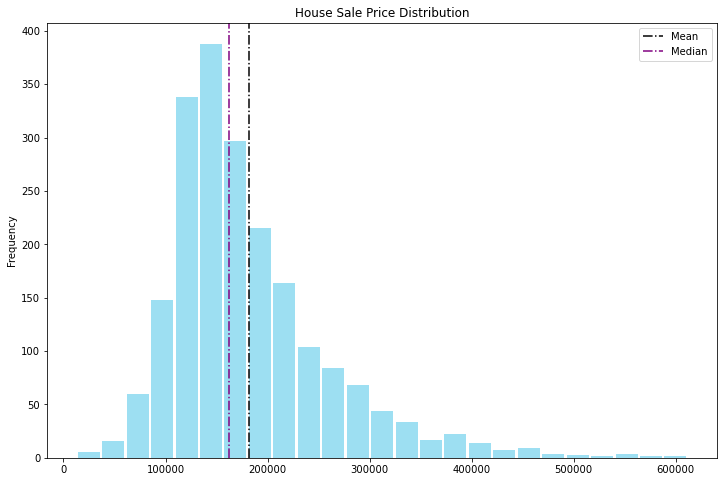

In [117]:
train.hist(column='SalePrice', bins=25, grid=False, figsize=(12,8),color='#9ddff2', zorder=2, rwidth=0.9);
plt.axvline(train['SalePrice'].mean(),color = 'black', label ='Mean', linestyle='-.')
plt.axvline(train['SalePrice'].median(),label ='Median',color = 'purple',linestyle='-.')
plt.ylabel('Frequency')
plt.title('House Sale Price Distribution')
plt.legend()

In [118]:
train.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [119]:
# logarithmic transformation of house sale price to make the range and scop smaller
#and make more density around the mean of the house sale price

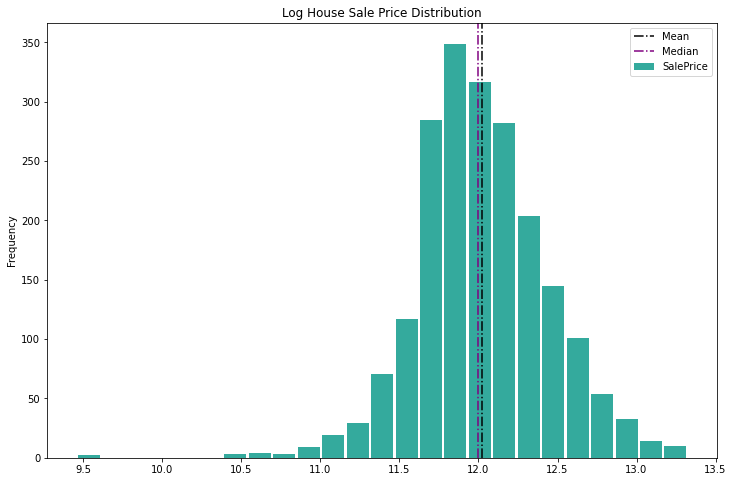

In [120]:
np.log(train['SalePrice']).plot.hist(bins=25, grid=False, figsize=(12,8),color='#34aa9d', zorder=2, rwidth=0.9) ;
plt.axvline(np.log(train['SalePrice']).mean(),color = 'black', label ='Mean', linestyle='-.')
plt.axvline(np.log(train['SalePrice']).median(),label ='Median',color = 'purple',linestyle='-.')
plt.ylabel('Frequency')
plt.title('Log House Sale Price Distribution')
plt.legend();

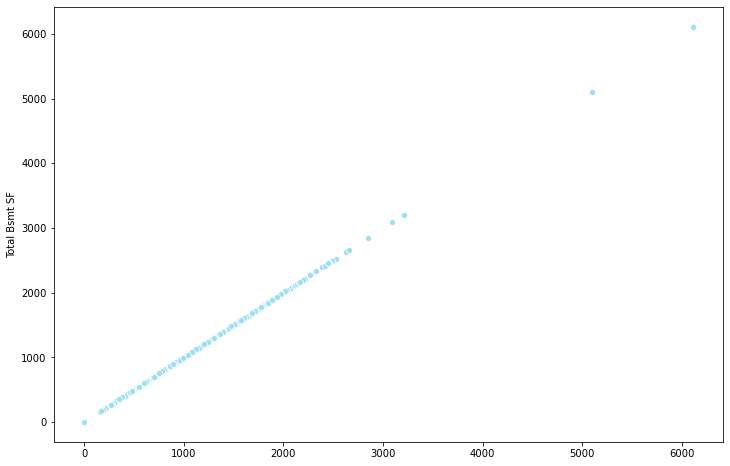

In [121]:
#this graph shows us that all of the other categories for basement are are dependent to Total Basement SF .
plt.figure(figsize=(12,8))

sns.scatterplot(train['BsmtFin SF 1']+train['BsmtFin SF 2']+train['Bsmt Unf SF'],train['Total Bsmt SF'], color='#9ddff2');

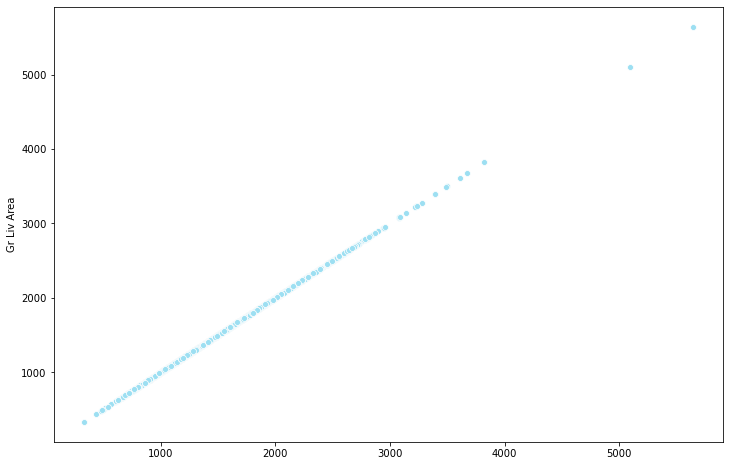

In [122]:
#this graph shows us that all of the other categories for square footage like: First and second Floor square feet and Low quality finished square 
#feet (all floors) are dependent to Above grade (ground) living area square feet.
plt.figure(figsize=(12,8))

sns.scatterplot(train['1st Flr SF']+train['2nd Flr SF']+train['Low Qual Fin SF'],train['Gr Liv Area'], color='#9ddff2')

In [123]:
#used the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from a Dataset train_new:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_corr = train_new.drop(columns=['SalePrice', 'PID', 'Id'])  #independent columns
y_corr= train_new['SalePrice']    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X_corr,y_corr)
train_new_scores = pd.DataFrame(fit.scores_)
train_new_columns = pd.DataFrame(X_corr.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([train_new_columns,train_new_scores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                    Specs         Score
1                Lot Area  4.415849e+06
8            Mas Vnr Area  3.839759e+05
16          Total Bsmt SF  2.601836e+05
41             3Ssn Porch  2.456770e+05
19            Gr Liv Area  2.426554e+05
38           Wood Deck SF  1.703562e+05
42           Screen Porch  1.584106e+05
34            Garage Area  1.360021e+05
40         Enclosed Porch  1.269995e+05
39          Open Porch SF  9.478963e+04
0            Lot Frontage  6.560208e+03
28             Functional  2.968612e+03
146  Exterior 1st_ImStucc  2.046000e+03
57        MS SubClass_150  2.046000e+03
63      MS Zoning_I (all)  2.046000e+03
140  Exterior 1st_AsphShn  2.046000e+03
84       Condition 2_RRAn  2.046000e+03
13          Bsmt Exposure  1.831812e+03
209     Misc Feature_Othr  1.702833e+03
30           Fireplace Qu  1.641978e+03


In [124]:
#col_choice=['Misc Val','Lot Area','2nd Flr SF','BsmtFin SF 1','Low Qual Fin SF', 'BsmtFin SF 2','Mas Vnr Area','Pool Area','Bsmt Unf SF','Total Bsmt SF' ]


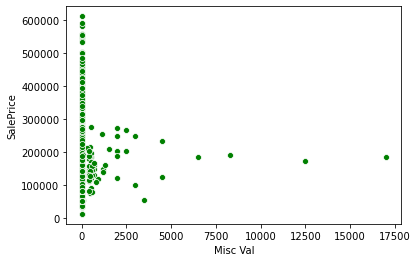

In [125]:
#I have to remove this column no useful data
sns.scatterplot(train['Misc Val'],train['SalePrice'],color = 'Green')

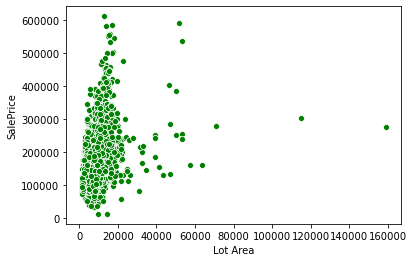

In [126]:
sns.scatterplot(train['Lot Area'],train['SalePrice'],color = 'Green')


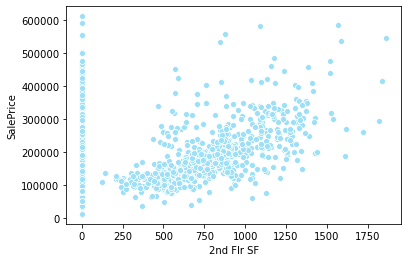

In [127]:
#good one
sns.scatterplot(train['2nd Flr SF'],train['SalePrice'],color = '#9ddff6')

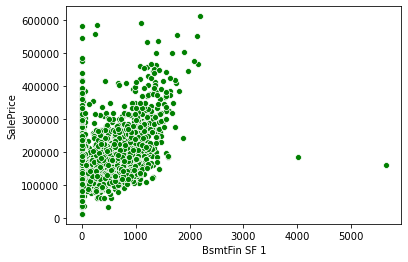

In [128]:
sns.scatterplot(train['BsmtFin SF 1'],train['SalePrice'],color = 'Green')

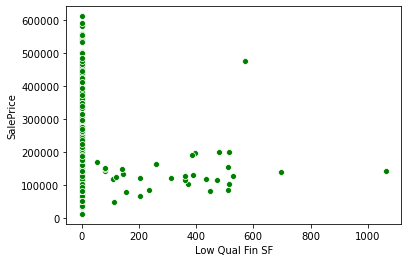

In [129]:
sns.scatterplot(train['Low Qual Fin SF'],train['SalePrice'],color = 'Green')

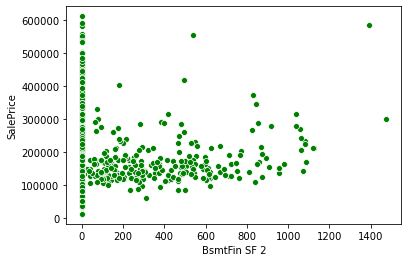

In [130]:
sns.scatterplot(train['BsmtFin SF 2'],train['SalePrice'],color = 'Green')

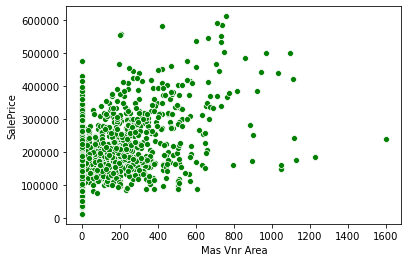

In [131]:
sns.scatterplot(train['Mas Vnr Area'],train['SalePrice'],color = 'Green')

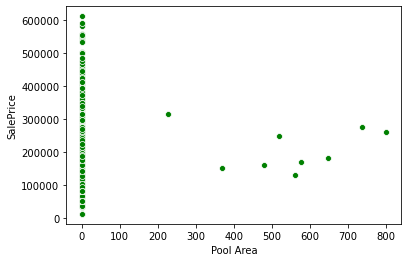

In [132]:
sns.scatterplot(train['Pool Area'],train['SalePrice'],color = 'Green')

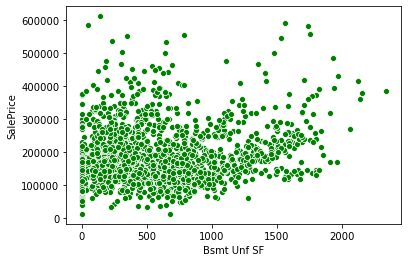

In [133]:
sns.scatterplot(train['Bsmt Unf SF'],train['SalePrice'],color = 'Green')

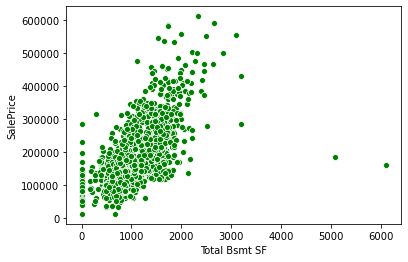

In [134]:
sns.scatterplot(train['Total Bsmt SF'],train['SalePrice'],color = 'Green')

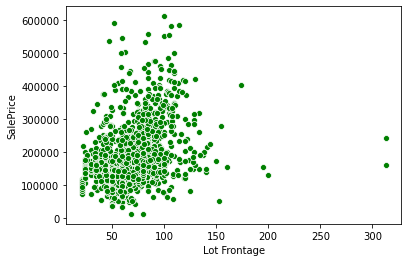

In [135]:
sns.scatterplot(train['Lot Frontage'],train['SalePrice'] ,color = 'Green')

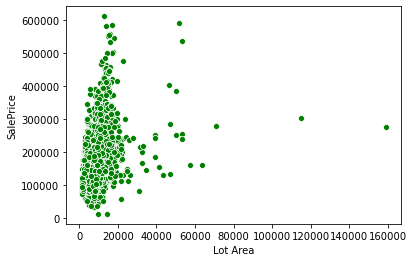

In [136]:
sns.scatterplot(train['Lot Area'],train['SalePrice'] ,color = 'Green')

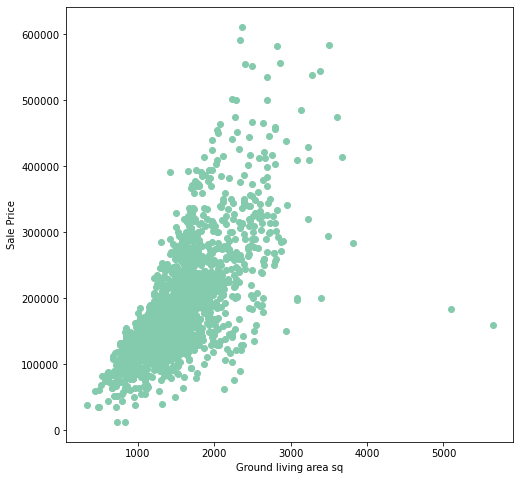

In [137]:
#let's plot the ground area sf and sale price
plt.figure(figsize=(8,8))
plt.scatter(x = train['Gr Liv Area'], y = train['SalePrice'], color='#84CAAD')
plt.xlabel('Ground living area sq')
plt.ylabel('Sale Price')
plt.show()




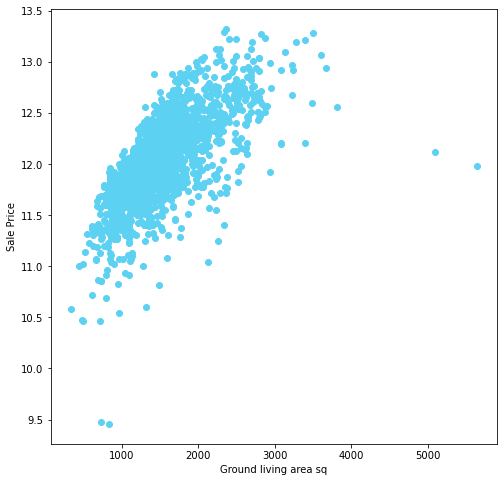

In [138]:
#let's get the log of sale price and compare again
plt.figure(figsize=(8,8))
plt.scatter(x = train['Gr Liv Area'], y = np.log(train['SalePrice']), color='#5cd1f2')
plt.xlabel('Ground living area sq')
plt.ylabel('Sale Price')
plt.show();

In [139]:
#we have some outliers, let's drop the ground living sf more than 4000 and sale price less than 10
train_new.drop(train_new[train_new['Gr Liv Area']>4000].index, inplace =True)
train_new.drop(train_new[np.log(train_new['SalePrice'])<10].index, inplace =True)

In [140]:
#double check train
train_new.shape

(2043, 219)

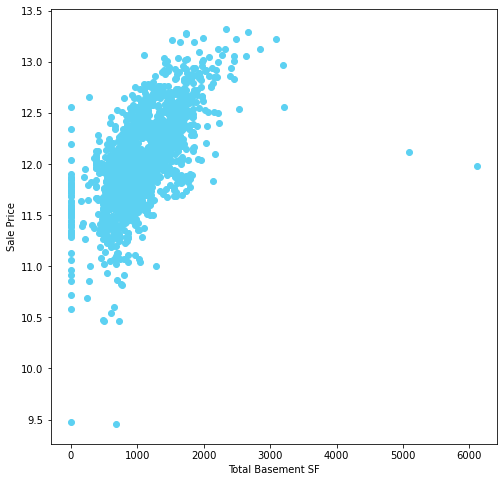

In [141]:
#let's get the log of sale price and compare with total bsmt sf
plt.figure(figsize=(8,8))
plt.scatter(x = train['Total Bsmt SF'], y = np.log(train['SalePrice']), color='#5cd1f2')
plt.xlabel('Total Basement SF')
plt.ylabel('Sale Price')
plt.show()

In [142]:
#we have some outliers, let's drop the total basement sf more than 3000
train_new.drop(train_new[train_new['Total Bsmt SF']>3000].index, inplace =True)

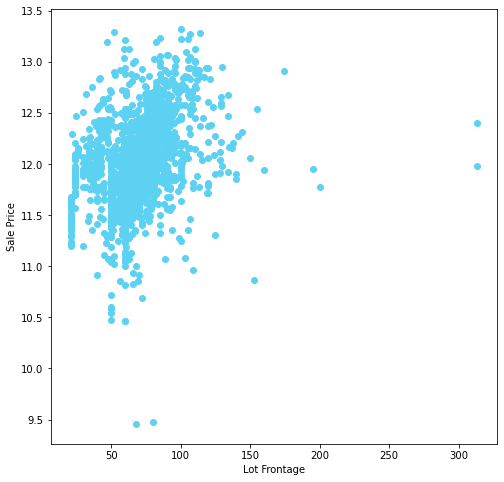

In [143]:
#let's get the log of sale price and compare with total lot frontage
plt.figure(figsize=(8,8))
plt.scatter(x = train['Lot Frontage'], y = np.log(train['SalePrice']), color='#5cd1f2')
plt.xlabel('Lot Frontage')
plt.ylabel('Sale Price')
plt.show()

In [144]:
#we have some outliers, let's drop the lot frontage more than 175
train_new.drop(train_new[train_new['Lot Frontage']>175].index, inplace =True)

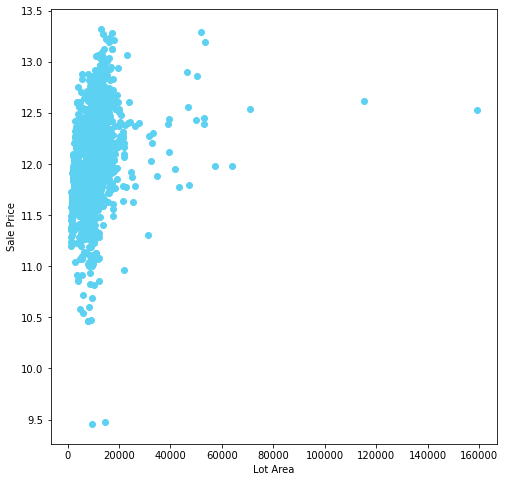

In [145]:
#let's get the log of sale price and compare with total lot area
plt.figure(figsize=(8,8))
plt.scatter(x = train['Lot Area'], y = np.log(train['SalePrice']), color='#5cd1f2')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.show()

In [146]:
#we have some outliers, let's drop the lot area more than 70000
train_new.drop(train_new[train_new['Lot Area']>70000].index, inplace =True)

In [147]:
X_train.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD


In [148]:
X= train_new.drop(['SalePrice'], axis=1)
y=train_new['SalePrice']

In [149]:
X.shape

(2034, 218)

In [150]:
y.shape

(2034,)

### Final Model :Let's do some feature engineering

In [151]:
#im done with cleaning and removing and filling null values, let's model

In [152]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=19)

In [153]:
#let's scale the features
ss= StandardScaler()
X_train_sc=ss.fit_transform(X_train)
X_test_sc=ss.transform(X_test)

In [154]:
#let's log the prices since the distribution is not normal
y_train_lg=np.log(y_train)
y_test_lg=np.log(y_test)

In [155]:
#let's try again gridsearchcv and elasticnet
param_gs22 = {
    'alpha':[.01,.1,.25,.3,0.31,.35,.5,1],
    'l1_ratio':np.arange(0.0, 1.0, 0.1)
}

gs22 = GridSearchCV(ElasticNet(),param_gs22 , cv=5, n_jobs=-1)

gs22.fit(X_train_sc,y_train_lg)

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.25, 0.3, 0.31, 0.35, 0.5, 1],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [156]:
gs22.best_params_

{'alpha': 0.01, 'l1_ratio': 0.30000000000000004}

In [157]:
gs22.score(X_train_sc, y_train_lg)

0.939654969004838

In [158]:
gs22.score(X_test_sc, y_test_lg)

0.9226014298237676

In [159]:
#let's get the coeff:

In [160]:
coef_df= pd.DataFrame(gs22.best_estimator_.coef_, index=X_train.columns, columns=['Coefficients'])

In [161]:
coef_df

,Coefficients
Id,0.000000
PID,0.000000
Lot Frontage,0.013922
Lot Area,0.027297
Alley,-0.000000
...,...
Misc Feature_TenC,0.000000
Mas Vnr Type_BrkFace,-0.000000
Mas Vnr Type_CBlock,0.000000
Mas Vnr Type_None,0.000000


In [162]:
#lets get the abs value of the coefficients to have both big negative and positive variables
coef_df['Absolute number']=abs(coef_df['Coefficients'])
coef_df

,Coefficients,Absolute number
Id,0.000000,0.000000
PID,0.000000,0.000000
Lot Frontage,0.013922,0.013922
Lot Area,0.027297,0.027297
Alley,-0.000000,0.000000
...,...,...
Misc Feature_TenC,0.000000,0.000000
Mas Vnr Type_BrkFace,-0.000000,0.000000
Mas Vnr Type_CBlock,0.000000,0.000000
Mas Vnr Type_None,0.000000,0.000000


In [163]:
#let's show the most powerful coefficients
tired=coef_df.sort_values('Coefficients', ascending=False).head(25)['Coefficients']
tired.to_frame()

,Coefficients
Gr Liv Area,0.120238
Overall Qual,0.076007
Year Built,0.049491
Overall Cond,0.040683
Total Bsmt SF,0.038644
Lot Area,0.027297
BsmtFin Type 1,0.021056
Garage Area,0.017533
Bsmt Full Bath,0.017099
Year Remod/Add,0.015338


In [164]:
#let's predict 
preds22=gs22.predict(X_test_sc)
preds22

array([12.72021483, 12.01480746, 12.27250813, 11.80239282, 12.19942216,
       12.1838995 , 12.3164074 , 12.33981973, 12.72473873, 12.24550238,
       11.73644167, 11.54505509, 11.77043155, 12.40917692, 12.11386143,
       12.17485512, 11.82034121, 11.56506988, 11.87676695, 11.31557343,
       11.96121932, 12.04978306, 12.08234729, 12.21450415, 11.84642874,
       11.7702409 , 12.1687793 , 12.48638167, 11.77139827, 12.46376379,
       12.33708618, 11.55772851, 11.76698217, 12.43791863, 12.17897344,
       11.86466228, 12.24841233, 12.565298  , 12.39005163, 12.19501742,
       12.1953698 , 12.5000709 , 12.08123733, 12.19748196, 11.87203902,
       12.5901963 , 11.71512365, 12.18606784, 12.49590537, 12.89107898,
       11.73418757, 12.10852206, 12.72352032, 11.96008492, 12.04483846,
       12.82751616, 12.67030989, 11.7777867 , 11.68849647, 13.05278312,
       12.39561753, 11.7919872 , 11.59329294, 11.46703216, 12.13938268,
       11.40754504, 12.29473147, 12.13910834, 12.36487731, 12.37

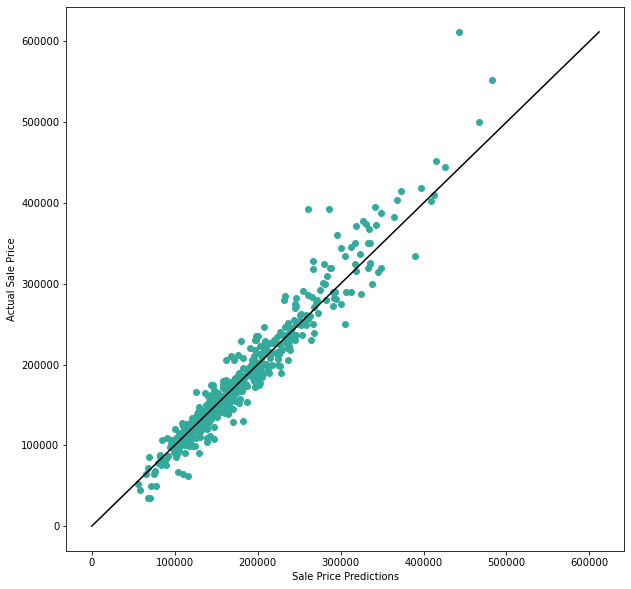

In [165]:
#let's plot the predictions and actual values
plt.figure(figsize=(10,10))
plt.scatter(np.exp(preds22), y_test, color='#34aa9d')
plt.xlabel('Sale Price Predictions')
plt.ylabel('Actual Sale Price');
plt.plot([0,np.max(y_test)],[0,np.max(y_test)], c = 'k');

### what I did, I fitted my model again on the whole training set without splitting into  x and y in order to have a larger data set to modeled my model

In [166]:
#let's give the whole training data to the model without splitting (X, y)
gs22_final=gs22.best_estimator_
X_whole_training_sc=ss.fit_transform(X)
y_whole_training_lg=np.log(y)

In [167]:
#with the whole training model with the scaled X and log Y

gs22_final.fit(X_whole_training_sc, y_whole_training_lg)
gs22_final.score(X_whole_training_sc, y_whole_training_lg)


0.9367301546973424

In [168]:
X_whole_testing_sc=ss.transform(test_new)

In [169]:
preds22_test_final=gs22_final.predict(X_whole_testing_sc)

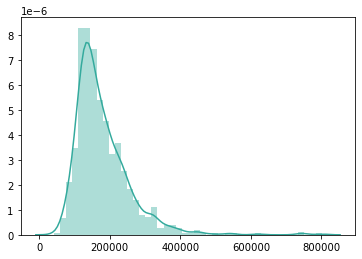

In [170]:
#DISTRIBUTION OF MY FINAL PREDICTIONS ON SALE PRICE
sns.distplot(np.exp(preds22_test_final), color='#34aa9d')

In [171]:
preds22_test_final=np.exp(preds22_test_final)

In [172]:
#how to submit the kaggle format csv file 
#submission_model22= pd.DataFrame(preds22_test_final, index=test_new['Id'])
#submission_model22.columns = ['SalePrice']
#submission_model22.to_csv('model22.csv')

In [173]:
#completed!

### The below cells are the models which are not perfectly good are stored in the more_codes

In [174]:
#I tried to choose just the very high correlated features with target and make a model 
#but the score is less than my final model so im not gonna continue working on it.

### Model 23- Score is less than the other one! so im not gonna work on it !

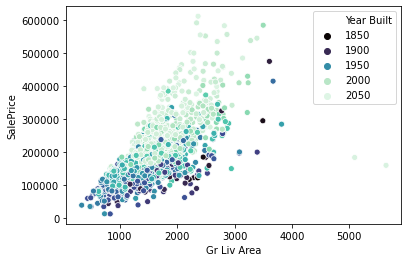

In [175]:
sns.scatterplot(x=train['Gr Liv Area'],y= train['SalePrice'], hue=train['Year Built'], palette="mako" );

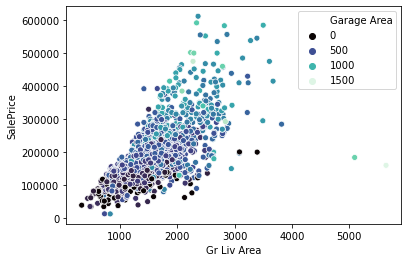

In [176]:
sns.scatterplot(x=train['Gr Liv Area'],y= train['SalePrice'], hue=train['Garage Area'], palette="mako" );

In [177]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [178]:
X= train_new[['Gr Liv Area','Overall Qual','Year Built','Overall Cond','Total Bsmt SF','Lot Area','BsmtFin Type 1',         
                'Garage Area','Bsmt Full Bath','Year Remod/Add','Fireplaces','Neighborhood_Crawfor',    
                'Screen Porch','Paved Drive','Heating QC','Lot Frontage','Kitchen Qual','Bsmt Exposure',           
                'Condition 1_Norm','Garage Cars']]
#y=train_new['SalePrice']

In [205]:
test_23=test_new[['Gr Liv Area','Overall Qual','Year Built','Overall Cond','Total Bsmt SF','Lot Area','BsmtFin Type 1',         
                'Garage Area','Bsmt Full Bath','Year Remod/Add','Fireplaces','Neighborhood_Crawfor',    
                'Screen Porch','Paved Drive','Heating QC','Lot Frontage','Kitchen Qual','Bsmt Exposure',           
                'Condition 1_Norm','Garage Cars']]

In [179]:
poly = PolynomialFeatures(include_bias=False)

In [180]:
X_poly = poly.fit_transform(X)

In [181]:
X_poly.shape

(2034, 230)

In [182]:
ss= StandardScaler()

In [183]:
X_train, X_test, y_train, y_test= train_test_split(X_poly, y, random_state=21)

In [184]:
X_train.shape

(1525, 230)

In [185]:
X_test.shape

(509, 230)

In [186]:
X_train_scaled=ss.fit_transform(X_train)

In [187]:
X_test_scaled=ss.transform(X_test)

In [188]:
X_train_scaled.shape

(1525, 230)

In [189]:
X_test_scaled.shape

(509, 230)

In [190]:
#let's log the prices since the distribution is not normal
y_train_lg=np.log(y_train)
y_test_lg=np.log(y_test)

In [191]:
y_train_lg.shape

(1525,)

In [192]:
#let's try again gridsearchcv and elasticnet
param_gs23 = {
    'alpha':[.01,.1,.25,.3,0.31,.35,.5,1],
    'l1_ratio':np.arange(0.0, 1.0, 0.1)
}

gs23 = GridSearchCV(ElasticNet(),param_gs23 , cv=10, n_jobs=-1)

gs23.fit(X_train_scaled,y_train_lg)

/Users/minootaghavi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09826886990926909, tolerance: 0.023771840830609237
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.25, 0.3, 0.31, 0.35, 0.5, 1],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [193]:
gs23.best_params_

{'alpha': 0.01, 'l1_ratio': 0.1}

In [194]:
gs23.score(X_train_scaled, y_train_lg)

0.920492731135816

In [195]:
gs23.score(X_test_scaled, y_test_lg)

0.9206149359648339

In [196]:
gs23=gs23.best_estimator_
X_whole_train_sc=ss.fit_transform(X)
y_whole_train_lg=np.log(y)

In [197]:
gs23.fit(X_whole_train_sc, y_whole_train_lg)
gs23.score(X_whole_train_sc, y_whole_train_lg)

0.9151374041190161

In [206]:
X_whole_test_sc=ss.transform(test_23)

In [207]:
preds23=gs23.predict(X_whole_test_sc)

In [209]:
model23= pd.DataFrame(preds23, index=test_new['Id'])
model23.columns = ['SalePrice']
model23.to_csv('model23.csv')